# BANK DATA  DATASET
Using the above dataset to build a Model using Logistic Regression model to predict whether the Customer will subscribe for a term deposit or not.

## BUSINESS OBJECTIVE
* Maximize Subscription
* Maximize Profit
* Minimize attrition
* Maximize Service Quality

## CONSTRAINTS
* Financial Unstability
* Customer trust

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
|1  | age             | Age of the customer                                               | Ratio     | Relevant      |
|2  | default         | Customer defaulted on their credit:'0' or '1'                     | Binary    | Relevant      |
|3  | balance         | Average Yearly balance                                            | Ratio     | Relevant      |
|4  | housing         | Housing loan:'0' or '1'                                           | Binary    | Relevant      |
|5  | loan            | Personal Loan:'0' or '1'                                          | Binary    | Relevant      |
|6  | duration        | Last contacted duration in seconds                                | Ratio     | Relevant      |
|7  | campaign        | Number of contacts performed during this campaign                 | Ratio     | Relevant      |
|8  | pdays           | Number of days since last contacted for a  previous campaign      | Ratio     | Relevant      |
|9  | previous        | number of contacts performed before this campaign                 | Ratio     | Relevant      |
|10 | poutfailure     | Outcome of the previous Marketing campaign is Failure:'0' or '1'  | Binary    | Relevant      |
|11 | poutother       | Outcome of the previous Marketing campaign is Other:'0' or '1'    | Binary    | Relevant      |
|12 | poutsuccess     | Outcome of the previous Marketing campaign is Success:'0' or '1'  | Binary    | Relevant      |
|13 | poutunknown     | Outcome of the previous Marketing campaign is Unknown:'0' or '1'  | Binary    | Relevant      |
|14 | con_cellular    | Contact communication type is Cellular:'0' or '1'                 | Binary    | Relevant      |
|15 | con_telephone   | Contact communication type is Telephone:'0' or '1'                | Binary    | Relevant      |
|16 | con_unknown     | Contact communication type is unknown:'0' or '1'                  | Binary    | Relevant      |
|17 | divorced        | Marital status is Divorced:'0' or '1'                             | Binary    | Relevant      |
|18 | married         | Marital status is Married:'0' or '1'                              | Binary    | Relevant      |
|19 | single          | Marital status is Single:'0' or '1'                               | Binary    | Relevant      |
|20 | joadmin         | Type of Job is Admin:'0' or '1'                                   | Binary    | Relevant      |
|21 | joblue.collar   | Type of Job is Blue collar:'0' or '1'                             | Binary    | Relevant      |
|22 | joentrepreneur  | Type of Job is Entrepreneur:'0' or '1'                            | Binary    | Relevant      |
|23 | johousemaid     | Type of Job is Maid:'0' or '1'                                    | Count     | Relevant      |
|24 | jomanagement    | Type of Job is Management:'0' or '1'                              | Binary    | Relevant      |
|25 | joretired       | Type of Job is Retired:'0' or '1'                                 | Binary    | Relevant      |
|26 | joself.employed | Type of Job is Self employed:'0' or '1'                           | Binary    | Relevant      |
|27 | joservices      | Type of Job is Services:'0' or '1'                                | Binary    | Relevant      |
|28 | jostudent       | Type of Job is Student:'0' or '1'                                 | Binary    | Relevant      |
|29 | jotechnician    | Type of Job is Technician:'0' or '1'                              | Binary    | Relevant      |
|30 | jounemployed    | Type of Job is Unemployed:'0' or '1'                              | Binary    | Relevant      |
|31 | jounknown       | Type of Job is Unknown:'0' or '1'                                 | Binary    | Relevant      |
|32 | y               | Whether the customer subscribed for a term deposit:'0' or '1'     | Binary    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass23\bank_data.csv")
df=df0.copy()
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(45211, 32)

In [4]:
df.dtypes

age                int64
default            int64
balance            int64
housing            int64
loan               int64
duration           int64
campaign           int64
pdays              int64
previous           int64
poutfailure        int64
poutother          int64
poutsuccess        int64
poutunknown        int64
con_cellular       int64
con_telephone      int64
con_unknown        int64
divorced           int64
married            int64
single             int64
joadmin.           int64
joblue.collar      int64
joentrepreneur     int64
johousemaid        int64
jomanagement       int64
joretired          int64
joself.employed    int64
joservices         int64
jostudent          int64
jotechnician       int64
jounemployed       int64
jounknown          int64
y                  int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  1


Dropping the duplicate record using drop_duplicates function.

In [8]:
df.drop_duplicates(keep='first',inplace=True)

Checking the Number and Percentage of Missing Values in the Dataset.

In [9]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 age                0
default            0
jounknown          0
jounemployed       0
jotechnician       0
jostudent          0
joservices         0
joself.employed    0
joretired          0
jomanagement       0
johousemaid        0
joentrepreneur     0
joblue.collar      0
joadmin.           0
single             0
married            0
divorced           0
con_unknown        0
con_telephone      0
con_cellular       0
poutunknown        0
poutsuccess        0
poutother          0
poutfailure        0
previous           0
pdays              0
campaign           0
duration           0
loan               0
housing            0
balance            0
y                  0
dtype: int64


Checking the number of unique values of each variable.

In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 age                  77
default               2
balance            7168
housing               2
loan                  2
duration           1573
campaign             48
pdays               559
previous             41
poutfailure           2
poutother             2
poutsuccess           2
poutunknown           2
con_cellular          2
con_telephone         2
con_unknown           2
divorced              2
married               2
single                2
joadmin.              2
joblue.collar         2
joentrepreneur        2
johousemaid           2
jomanagement          2
joretired             2
joself.employed       2
joservices            2
jostudent             2
jotechnician          2
jounemployed          2
jounknown             2
y                     2
dtype: int64


Dropping some of the irrelevant columns which will not useful for analyis. 

In [11]:
df.rename(columns = {'joblue.collar':'joblue_collar','joadmin.':'joadmin','joself.employed':'joself_employed'}, inplace = True)
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin', 'joblue_collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself_employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [12]:
df.mean()

age                  40.935921
default               0.018027
balance            1362.302190
housing               0.555850
loan                  0.160230
duration            258.164057
campaign              2.763835
pdays                40.198739
previous              0.580336
poutfailure           0.108405
poutother             0.040699
poutsuccess           0.033422
poutunknown           0.817474
con_cellular          0.647733
con_telephone         0.064278
con_unknown           0.287989
divorced              0.115174
married               0.601924
single                0.282902
joadmin               0.114377
joblue_collar         0.215262
joentrepreneur        0.032891
johousemaid           0.027428
jomanagement          0.209179
joretired             0.050077
joself_employed       0.034926
joservices            0.091882
jostudent             0.020748
jotechnician          0.168038
jounemployed          0.028821
jounknown             0.006370
y                     0.116987
dtype: f

In [13]:
df.median()

age                 39.0
default              0.0
balance            448.0
housing              1.0
loan                 0.0
duration           180.0
campaign             2.0
pdays               -1.0
previous             0.0
poutfailure          0.0
poutother            0.0
poutsuccess          0.0
poutunknown          1.0
con_cellular         1.0
con_telephone        0.0
con_unknown          0.0
divorced             0.0
married              1.0
single               0.0
joadmin              0.0
joblue_collar        0.0
joentrepreneur       0.0
johousemaid          0.0
jomanagement         0.0
joretired            0.0
joself_employed      0.0
joservices           0.0
jostudent            0.0
jotechnician         0.0
jounemployed         0.0
jounknown            0.0
y                    0.0
dtype: float64

In [14]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_23808\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[ 32,   0,   0,   1,   0, 124,   1,  -1,   0,   0,   0,   0,   1,
          1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0]], dtype=int64), count=array([[ 2085, 44395,  3513, 25130, 37966,   188, 17544, 36953, 36953,
        40309, 43370, 43699, 36958, 29284, 42304, 32190, 40003, 27213,
        32420, 40039, 35478, 43723, 43970, 35753, 42946, 43631, 41056,
        44272, 37613, 43907, 44922, 39921]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [15]:
df.var()

age                1.127568e+02
default            1.770240e-02
balance            9.270763e+06
housing            2.468862e-01
loan               1.345593e-01
duration           6.632200e+04
campaign           9.597944e+00
pdays              1.002595e+04
previous           5.305951e+00
poutfailure        9.665567e-02
poutother          3.904342e-02
poutsuccess        3.230551e-02
poutunknown        1.492136e-01
con_cellular       2.281801e-01
con_telephone      6.014751e-02
con_unknown        2.050560e-01
divorced           1.019109e-01
married            2.396167e-01
single             2.028730e-01
joadmin            1.012974e-01
joblue_collar      1.689281e-01
joentrepreneur     3.180984e-02
johousemaid        2.667588e-02
jomanagement       1.654270e-01
joretired          4.757072e-02
joself_employed    3.370683e-02
joservices         8.344181e-02
jostudent          2.031761e-02
jotechnician       1.398044e-01
jounemployed       2.799102e-02
jounknown          6.329832e-03
y       

In [16]:
df.std()

age                  10.618702
default               0.133050
balance            3044.792762
housing               0.496876
loan                  0.366823
duration            257.530577
campaign              3.098055
pdays               100.129666
previous              2.303465
poutfailure           0.310895
poutother             0.197594
poutsuccess           0.179737
poutunknown           0.386282
con_cellular          0.477682
con_telephone         0.245250
con_unknown           0.452831
divorced              0.319235
married               0.489507
single                0.450414
joadmin               0.318273
joblue_collar         0.411009
joentrepreneur        0.178353
johousemaid           0.163328
jomanagement          0.406727
joretired             0.218107
joself_employed       0.183594
joservices            0.288863
jostudent             0.142540
jotechnician          0.373904
jounemployed          0.167305
jounknown             0.079560
y                     0.321409
dtype: f

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [17]:
df.skew()

age                 0.684885
default             7.245290
balance             8.360244
housing            -0.224816
loan                1.852581
duration            3.144275
campaign            4.898602
pdays               2.615675
previous           41.846063
poutfailure         2.519257
poutother           4.649141
poutsuccess         5.192008
poutunknown        -1.643816
con_cellular       -0.618568
con_telephone       3.553449
con_unknown         0.936420
divorced            2.411036
married            -0.416456
single              0.964035
joadmin             2.423330
joblue_collar       1.385618
joentrepreneur      5.238256
johousemaid         5.787063
jomanagement        1.430116
joretired           4.125885
joself_employed     5.066551
joservices          2.825809
jostudent           6.724766
jotechnician        1.775731
jounemployed        5.632818
jounknown          12.409504
y                   2.383441
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [18]:
df.kurt()

age                   0.319743
default              50.496468
balance             140.749309
housing              -1.949544
loan                  1.432120
duration             18.153427
campaign             39.248760
pdays                 6.934954
previous           4506.772650
poutfailure           4.346847
poutother            19.615380
poutsuccess          24.958053
poutunknown           0.702163
con_cellular         -1.617445
con_telephone        10.627469
con_unknown          -1.123168
divorced              3.813262
married              -1.826646
single               -1.070683
joadmin               3.872700
joblue_collar        -0.080066
joentrepreneur       25.440453
johousemaid          31.491494
jomanagement          0.045233
joretired            15.023593
joself_employed      23.670986
joservices            5.985459
jostudent            43.224394
jotechnician          1.153272
jounemployed         29.729950
jounknown           152.002521
y                     3.680956
dtype: f

### GRAPHICAL REPRESENTATION

Using the countplots and distribution plots to understand the different variables.

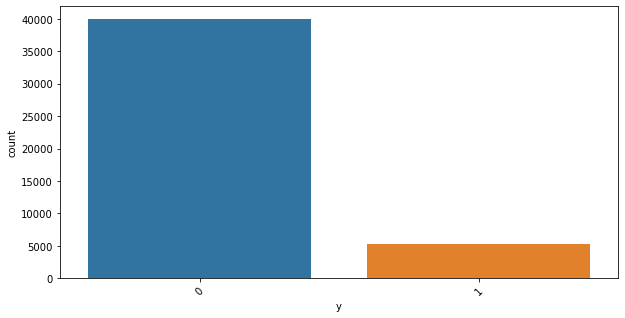

In [20]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df["y"])
plt.xticks(rotation = 45)
plt.show()

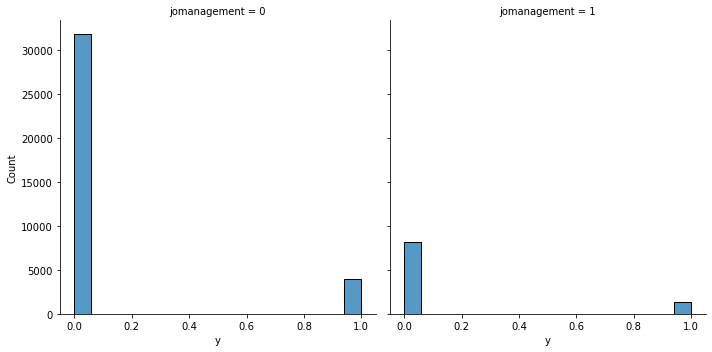

In [21]:
sns.displot(df, x="y", col="jomanagement")

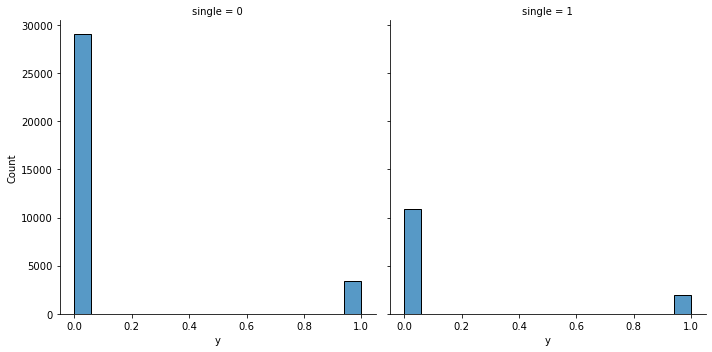

In [22]:
sns.displot(df, x="y", col="single")

From the pairplot we can observe all the scatter plots and histograms of the numerical variables of the dataset.

<Figure size 432x288 with 0 Axes>

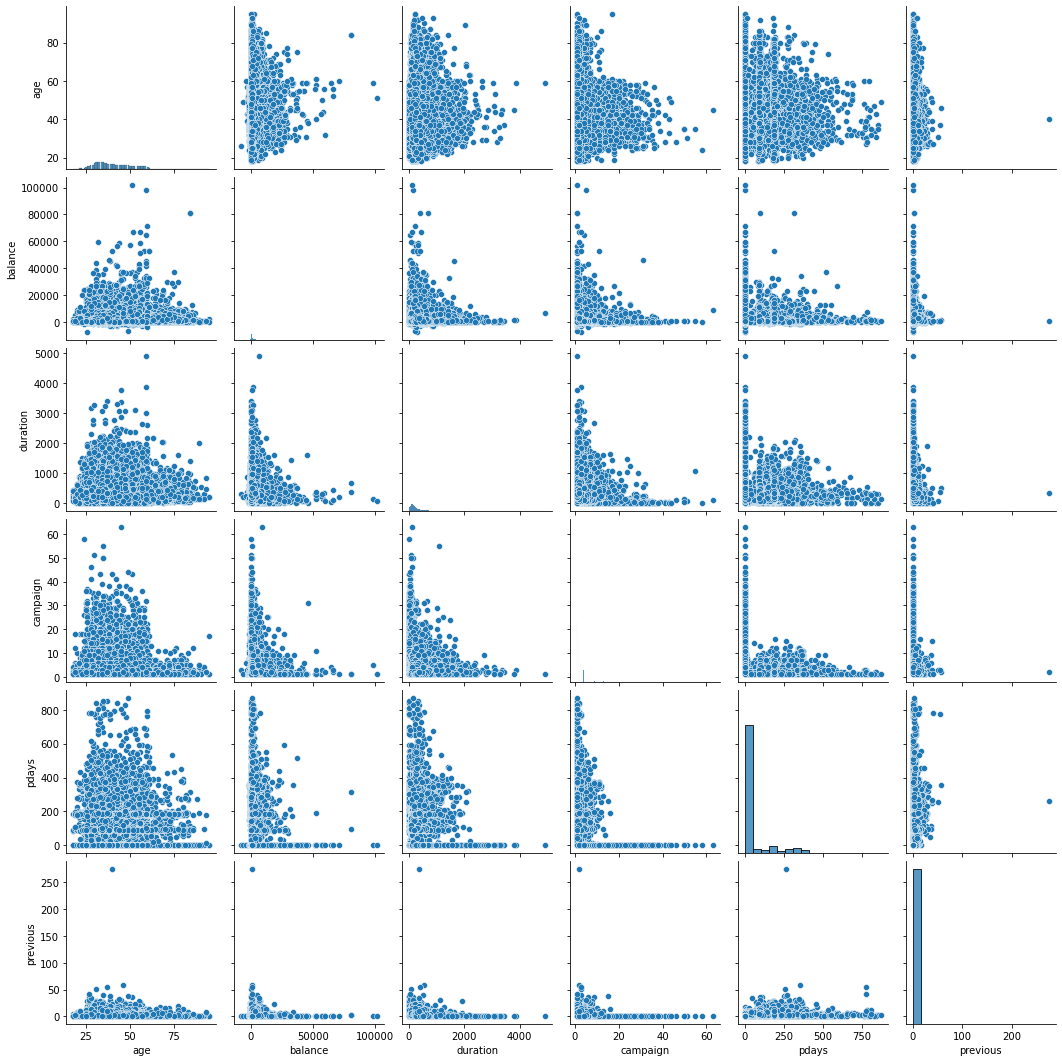

In [24]:
plt.figure()
sns.pairplot(df, vars=['age', 'balance', 'duration', 'campaign','pdays', 'previous'])
plt.show()

Plotting the boxplots of each variable. 

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

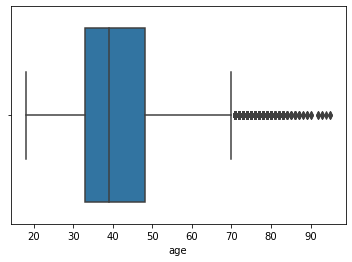

In [25]:
sns.boxplot(df["age"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

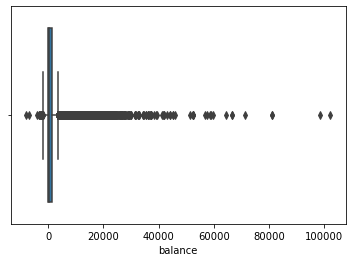

In [26]:
sns.boxplot(df["balance"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

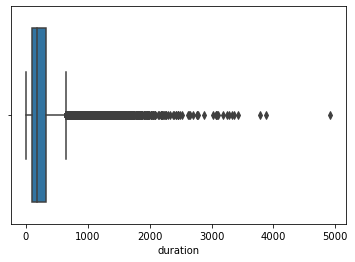

In [27]:
sns.boxplot(df["duration"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

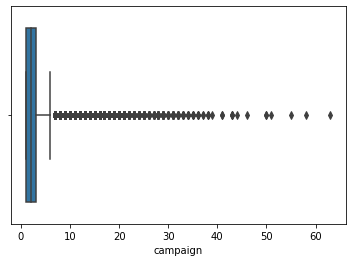

In [28]:
sns.boxplot(df["campaign"])

from the boxplots it is clear that there are outliers in the above variables so checking the number of outliers in each variable using the below custom function. 

In [29]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [31]:
sum(outlier_func(df["age"]))

487

In [32]:
sum(outlier_func(df['balance']))

4729

In [33]:
sum(outlier_func(df['duration']))

3235

In [34]:
sum(outlier_func(df['campaign']))

3064

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [35]:
from feature_engine.outliers import Winsorizer

In [37]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['age'])

df['age']= winsor.fit_transform(df[['age']])
sum(outlier_func(df['age']))

0

In [38]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['balance'])

df['balance']= winsor.fit_transform(df[['balance']])
sum(outlier_func(df['balance']))

0

In [39]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['duration'])

df['duration']= winsor.fit_transform(df[['duration']])
sum(outlier_func(df['duration']))

0

In [40]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['campaign'])

df['campaign']= winsor.fit_transform(df[['campaign']])
sum(outlier_func(df['campaign']))

0

__CORRELATION CHART__

<AxesSubplot:>

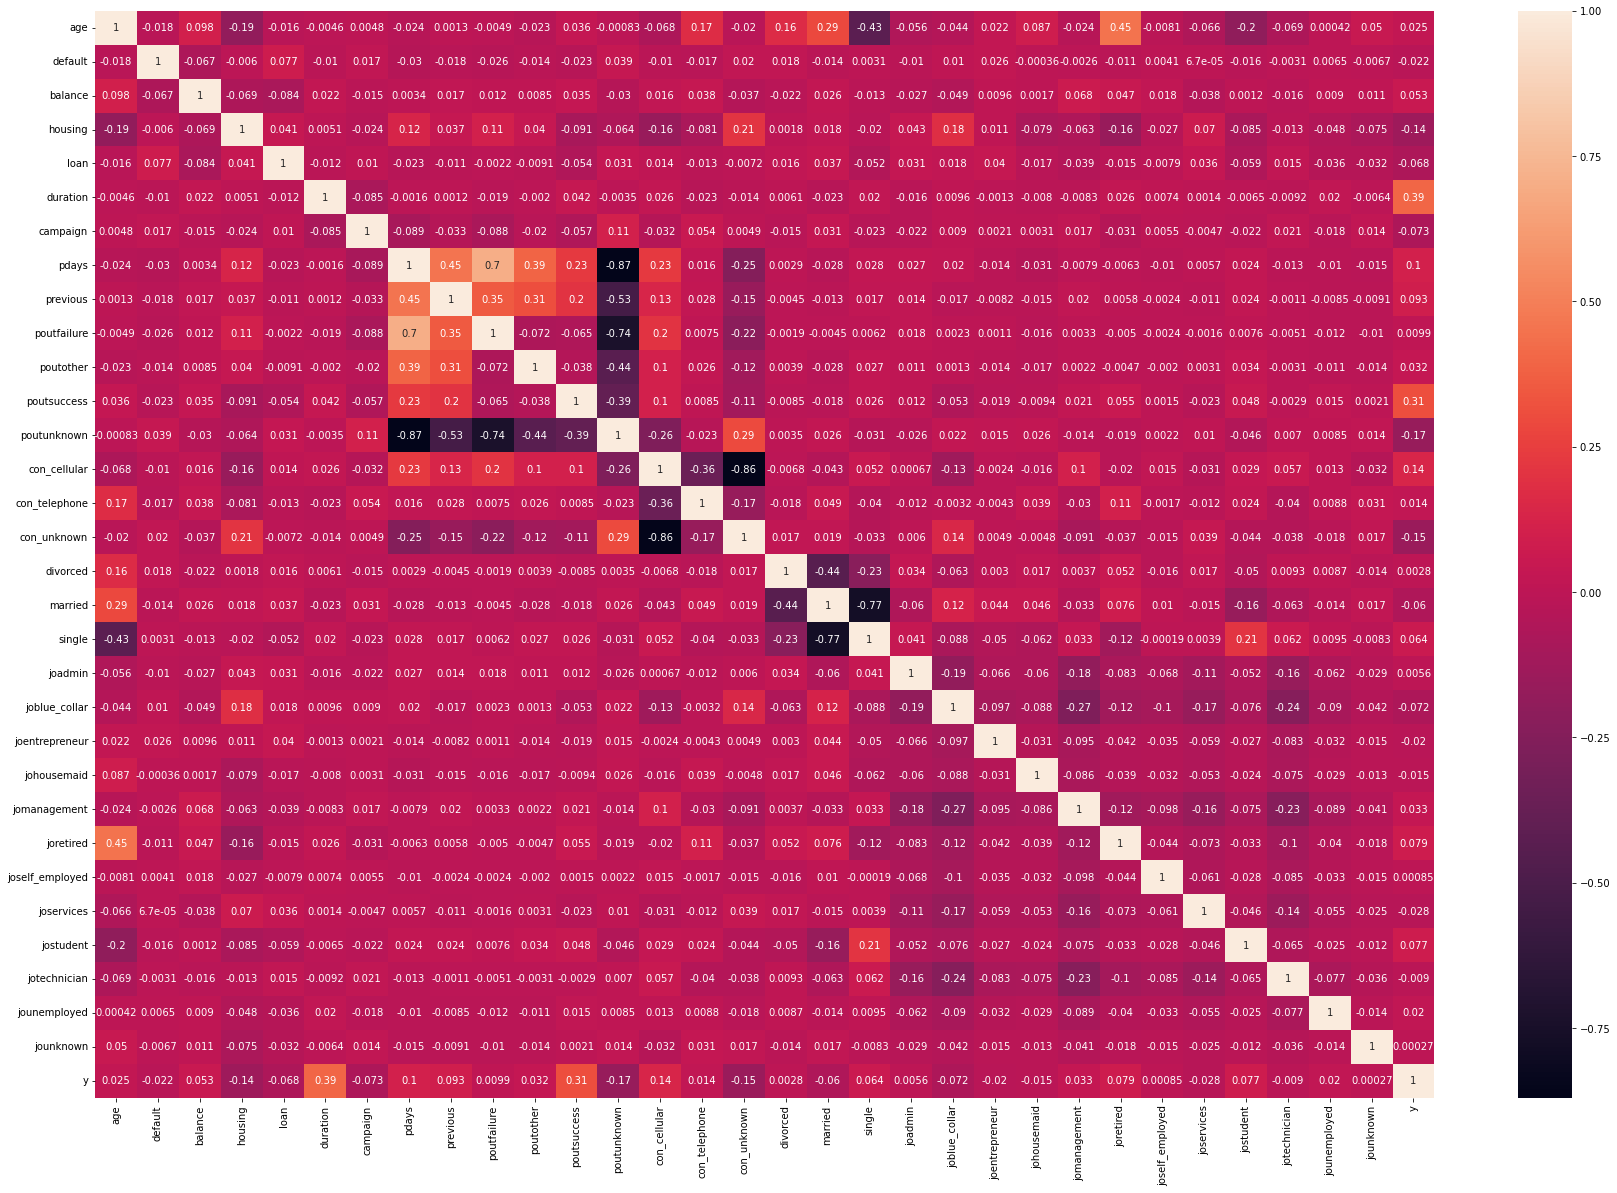

In [25]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that no variable has a very strong relation with the output variable

#### MODEL BUILDING

Importing the library required for building the model. 

In [26]:
import statsmodels.formula.api as smf

__Logistic Regression__

Fitting the model

In [28]:
logit_model = smf.logit('y ~ age + default + balance + housing + loan  + duration + campaign + pdays + previous + poutfailure + poutother + poutsuccess + poutunknown + con_cellular + con_telephone + con_unknown + divorced + married + single + joadmin + joblue_collar + joentrepreneur + johousemaid + jomanagement + joretired + joself_employed + joservices + jostudent + jotechnician + jounemployed + jounknown', data = df).fit()

         Current function value: 0.250380
         Iterations: 35


C:\Users\lenny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


For getting the value of AIC we use the summary2

In [29]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:                   Logit                Pseudo R-squared:     0.306     
Dependent Variable:      y                    AIC:                  22695.3370
Date:                    2022-11-22 17:59     BIC:                  22939.4711
No. Observations:        45210                Log-Likelihood:       -11320.   
Df Model:                27                   LL-Null:              -16315.   
Df Residuals:            45182                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                 Coef.    Std.Err.     z     P>|z|      [0.025       0.975]   
------------------------------------------------------------------------------
Intercept       -1.1616 478787.0512  -0.0000 1.0000  -938406.5382  938404.2149
age              0.0004      0.0021   0.1702 0.8648       -0.0038       0.0045
default         -0.1823      0.1613  -1.1300 0.2585       -0.4984       0.1339
balance          0.0000      0.0000   3.8591 0.0001        0.0000       0.0000
housing         -0.7756      0.0395 -19.6193 0.0000       -0.8531      -0.6981
loan            -0.5720      0.0581  -9.8430 0.0000       -0.6859      -0.4581
duration         0.0040      0.0001  64.6176 0.0000        0.0039       0.0042
campaign        -0.1093      0.0099 -11.0367 0.0000       -0.1287      -0.0899
pdays            0.0001      0.0003   0.4798 0.6314       -0.0004       0.0007
previous         0.0104      0.0064   1.6197 0.1053       -0.0022       0.0230
poutfailure     -0.8640 549694.1336  -0.0000 1.0000 -1077381.5683 1077379.8402
poutother       -0.6218 547095.0924  -0.0000 1.0000 -1072287.2989 1072286.0554
poutsuccess      1.4445 549694.1336   0.0000 1.0000 -1077379.2598 1077382.1488
poutunknown     -1.1202 552280.9438  -0.0000 1.0000 -1082451.8794 1082449.6389
con_cellular     0.0343 479188.9067   0.0000 1.0000  -939192.9647  939193.0333
con_telephone   -0.0644 479335.3357  -0.0000 1.0000  -939480.0590  939479.9302
con_unknown     -1.1315 478895.9144  -0.0000 1.0000  -938619.8761  938617.6131
divorced        -0.3915 251629.2227  -0.0000 1.0000  -493184.6055  493183.8224
married         -0.5547 251629.2227  -0.0000 1.0000  -493184.7687  493183.6592
single          -0.2153 251629.2227  -0.0000 1.0000  -493184.4293  493183.9986
joadmin          0.0705 583598.5426   0.0000 1.0000 -1143832.0545 1143832.1955
joblue_collar   -0.3931 583598.5426  -0.0000 1.0000 -1143832.5181 1143831.7319
joentrepreneur  -0.3334 583598.5426  -0.0000 1.0000 -1143832.4584 1143831.7916
johousemaid     -0.5037 583598.5426  -0.0000 1.0000 -1143832.6287 1143831.6213
jomanagement     0.0121 583598.5426   0.0000 1.0000 -1143832.1129 1143832.1371
joretired        0.4054 583598.5426   0.0000 1.0000 -1143831.7196 1143832.5304
joself_employed -0.2064 583598.5426  -0.0000 1.0000 -1143832.3314 1143831.9186
joservices      -0.2629 583598.5426  -0.0000 1.0000 -1143832.3879 1143831.8621
jostudent        0.5827 583598.5426   0.0000 1.0000 -1143831.5423 1143832.7077
jotechnician    -0.1622 583598.5426  -0.0000 1.0000 -1143832.2872 1143831.9628
jounemployed    -0.1444 583598.5426  -0.0000 1.0000 -1143832.2694 1143831.9806
jounknown       -0.2261 583598.5426  -0.0000 1.0000 -1143832.3511 1143831.8989
==============================================================================

"""

In [30]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45210
Model:                          Logit   Df Residuals:                    45182
Method:                           MLE   Df Model:                           27
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.3062
Time:                        17:59:23   Log-Likelihood:                -11320.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1616   4.79e+05  -2.43e-06      1.000   -9.38e+05    9.38e+05
age                 0.0004      0.002      0.170      0.865      -0.004       0.005
default            -0.1823      0.161     -1.130      0.258      -0.498       0.134
balance          1.871e-05   4.85e-06      3.859      0.000    9.21e-06    2.82e-05
housing            -0.7756      0.040    -19.619      0.000      -0.853      -0.698
loan               -0.5720      0.058     -9.843      0.000      -0.686      -0.458
duration            0.0040   6.26e-05     64.618      0.000       0.004       0.004
campaign           -0.1093      0.010    -11.037      0.000      -0.129      -0.090
pdays               0.0001      0.000      0.480      0.631      -0.000       0.001
previous            0.0104      0.006      1.620      0.105      -0.002       0.023
poutfailure        -0.8640    5.5e+05  -1.57e-06      1.000   -1.08e+06    1.08e+06
poutother          -0.6218   5.47e+05  -1.14e-06      1.000   -1.07e+06    1.07e+06
poutsuccess         1.4445    5.5e+05   2.63e-06      1.000   -1.08e+06    1.08e+06
poutunknown        -1.1202   5.52e+05  -2.03e-06      1.000   -1.08e+06    1.08e+06
con_cellular        0.0343   4.79e+05   7.15e-08      1.000   -9.39e+05    9.39e+05
con_telephone      -0.0644   4.79e+05  -1.34e-07      1.000   -9.39e+05    9.39e+05
con_unknown        -1.1315   4.79e+05  -2.36e-06      1.000   -9.39e+05    9.39e+05
divorced           -0.3915   2.52e+05  -1.56e-06      1.000   -4.93e+05    4.93e+05
married            -0.5547   2.52e+05   -2.2e-06      1.000   -4.93e+05    4.93e+05
single             -0.2153   2.52e+05  -8.56e-07      1.000   -4.93e+05    4.93e+05
joadmin             0.0705   5.84e+05   1.21e-07      1.000   -1.14e+06    1.14e+06
joblue_collar      -0.3931   5.84e+05  -6.74e-07      1.000   -1.14e+06    1.14e+06
joentrepreneur     -0.3334   5.84e+05  -5.71e-07      1.000   -1.14e+06    1.14e+06
johousemaid        -0.5037   5.84e+05  -8.63e-07      1.000   -1.14e+06    1.14e+06
jomanagement        0.0121   5.84e+05   2.07e-08      1.000   -1.14e+06    1.14e+06
joretired           0.4054   5.84e+05   6.95e-07      1.000   -1.14e+06    1.14e+06
joself_employed    -0.2064   5.84e+05  -3.54e-07      1.000   -1.14e+06    1.14e+06
joservices         -0.2629   5.84e+05  -4.51e-07      1.000   -1.14e+06    1.14e+06
jostudent           0.5827   5.84e+05   9.99e-07      1.000   -1.14e+06    1.14e+06
jotechnician       -0.1622   5.84e+05  -2.78e-07      1.000   -1.14e+06    1.14e+06
jounemployed       -0.1444   5.84e+05  -2.47e-07      1.000   -1.14e+06    1.14e+06
jounknown          -0.2261   5.84e+05  -3.87e-07      1.000   -1.14e+06    1.14e+06
===================================================================================
"""

from summary2 we consider the AIC value which we can use to compare the models and decide which is better. 

Loading the libraries required for getting the accuracy scores of the model. 

In [31]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

Predicting the values using the model. 

In [32]:
pred = logit_model.predict(df.iloc[ :, 0:32 ])

From the sklearn library using roc_curve to find the fpr, tpr and thresholds to find the optimal threshold. 

In [33]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin', 'joblue_collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself_employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

In [34]:
# from sklearn import metrics
fpr, tpr, thresholds = roc_curve(df.y, pred)
# Using the argmax to find the index which has the highest difference between the True Positive Rate and False Positive Rate. 
optimal_idx = np.argmax(tpr - fpr)
# Identifying the optimal threshold and saving it using the index value. 
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11474888234388593

Importing the library required to create the ROC curve. 

In [35]:
import pylab as pl

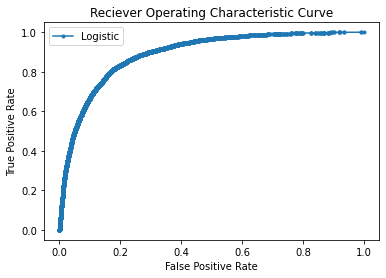

In [36]:
pl.plot(fpr,tpr, marker='.', label='Logistic');pl.xlabel('False Positive Rate');pl.ylabel('True Positive Rate');pl.title('Reciever Operating Characteristic Curve')
pl.legend()
pl.show()

Using the auc function to get the Area under the ROC Curve. 

In [37]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.890843


Getting the classification report after setting the optimal threshold value as the cutoff value and converting the predicted probabilities into the binary output. 

In [39]:
# filling all the cells with zeroes
df["pred"] = np.zeros(45210)
# taking threshold value and above the prob value will be treated as correct value 
df.loc[pred > optimal_threshold, "pred"] = 1
# classification report
print(classification_report(y_pred=df["pred"], y_true=df["y"]))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     39921
           1       0.38      0.81      0.52      5289

    accuracy                           0.82     45210
   macro avg       0.67      0.82      0.70     45210
weighted avg       0.90      0.82      0.85     45210



Saving the classification report in a dataframe.

In [41]:
classification_report = pd.DataFrame(classification_report(y_pred =df["pred"], y_true =df["y"], output_dict=True)).transpose()
classification_report

,precision,recall,f1-score,support
0,0.970819,0.821698,0.890056,39921.000000
1,0.376762,0.813575,0.515021,5289.000000
accuracy,0.820748,0.820748,0.820748,0.820748
macro avg,0.673791,0.817637,0.702538,45210.000000
weighted avg,0.901322,0.820748,0.846181,45210.000000


Using the train test split function to split the data into train and test dataset. 

In [42]:
df_train, df_test = train_test_split(df, test_size = 0.3,random_state=1000) # 30% test data

Fitting the model on the training data. 

In [43]:
model = smf.logit('y ~ age + default + balance + housing + loan  + duration + campaign + pdays + previous + poutfailure + poutother + poutsuccess + poutunknown + con_cellular + con_telephone + con_unknown + divorced + married + single + joadmin + joblue_collar + joentrepreneur + johousemaid + jomanagement + joretired + joself_employed + joservices + jostudent + jotechnician + jounemployed + jounknown' , data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.248095
         Iterations 8


In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31619
Method:                           MLE   Df Model:                           27
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.3066
Time:                        18:13:49   Log-Likelihood:                -7851.5
converged:                       True   LL-Null:                       -11323.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2138   2.15e+05  -5.64e-06      1.000   -4.22e+05    4.22e+05
age                 0.0019      0.003      0.740      0.459      -0.003       0.007
default            -0.0492      0.187     -0.263      0.792      -0.416       0.317
balance          2.001e-05   5.75e-06      3.478      0.001    8.74e-06    3.13e-05
housing            -0.7533      0.048    -15.826      0.000      -0.847      -0.660
loan               -0.5823      0.071     -8.218      0.000      -0.721      -0.443
duration            0.0040   7.51e-05     53.875      0.000       0.004       0.004
campaign           -0.1022      0.012     -8.709      0.000      -0.125      -0.079
pdays               0.0002      0.000      0.579      0.562      -0.000       0.001
previous            0.0046      0.007      0.704      0.481      -0.008       0.018
poutfailure        -0.8643   1.96e+05   -4.4e-06      1.000   -3.85e+05    3.85e+05
poutother          -0.6351   1.97e+05  -3.23e-06      1.000   -3.86e+05    3.86e+05
poutsuccess         1.4369   1.97e+05    7.3e-06      1.000   -3.86e+05    3.86e+05
poutunknown        -1.1512   1.96e+05  -5.86e-06      1.000   -3.85e+05    3.85e+05
con_cellular        0.0208        nan        nan        nan         nan         nan
con_telephone      -0.1432        nan        nan        nan         nan         nan
con_unknown        -1.0913        nan        nan        nan         nan         nan
divorced           -0.4734        nan        nan        nan         nan         nan
married            -0.5686        nan        nan        nan         nan         nan
single             -0.1718        nan        nan        nan         nan         nan
joadmin             0.0254        nan        nan        nan         nan         nan
joblue_collar      -0.3714        nan        nan        nan         nan         nan
joentrepreneur     -0.3646        nan        nan        nan         nan         nan
johousemaid        -0.3895        nan        nan        nan         nan         nan
jomanagement       -0.0215        nan        nan        nan         nan         nan
joretired           0.3613        nan        nan        nan         nan         nan
joself_employed    -0.2508        nan        nan        nan         nan         nan
joservices         -0.3073        nan        nan        nan         nan         nan
jostudent           0.6506        nan        nan        nan         nan         nan
jotechnician       -0.1930        nan        nan        nan         nan         nan
jounemployed       -0.1770        nan        nan        nan         nan         nan
jounknown          -0.1761        nan        nan        nan         nan         nan
===================================================================================
"""

In [45]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.307     
Dependent Variable:      y                   AIC:                 15758.9518
Date:                    2022-11-22 18:14    BIC:                 15993.0989
No. Observations:        31647               Log-Likelihood:      -7851.5   
Df Model:                27                  LL-Null:             -11323.   
Df Residuals:            31619               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                 Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
----------------------------------------------------------------------------
Intercept       -1.2138 215056.4565  -0.0000 1.0000 -421504.1232 421501.6956
age              0.0019      0.0026   0.7402 0.4592      -0.0031      0.0069
default         -0.0492      0.1870  -0.2631 0.7925      -0.4158      0.3174
balance          0.0000      0.0000   3.4785 0.0005       0.0000      0.0000
housing         -0.7533      0.0476 -15.8258 0.0000      -0.8466     -0.6600
loan            -0.5823      0.0709  -8.2183 0.0000      -0.7211     -0.4434
duration         0.0040      0.0001  53.8752 0.0000       0.0039      0.0042
campaign        -0.1022      0.0117  -8.7085 0.0000      -0.1252     -0.0792
pdays            0.0002      0.0004   0.5794 0.5623      -0.0005      0.0009
previous         0.0046      0.0066   0.7039 0.4815      -0.0083      0.0175
poutfailure     -0.8643 196411.7702  -0.0000 1.0000 -384960.8601 384959.1314
poutother       -0.6351 196758.0739  -0.0000 1.0000 -385639.3737 385638.1034
poutsuccess      1.4369 196758.0739   0.0000 1.0000 -385637.3016 385640.1755
poutunknown     -1.1512 196296.1999  -0.0000 1.0000 -384734.6333 384732.3308
con_cellular     0.0208         nan      nan    nan          nan         nan
con_telephone   -0.1432         nan      nan    nan          nan         nan
con_unknown     -1.0913         nan      nan    nan          nan         nan
divorced        -0.4734         nan      nan    nan          nan         nan
married         -0.5686         nan      nan    nan          nan         nan
single          -0.1718         nan      nan    nan          nan         nan
joadmin          0.0254         nan      nan    nan          nan         nan
joblue_collar   -0.3714         nan      nan    nan          nan         nan
joentrepreneur  -0.3646         nan      nan    nan          nan         nan
johousemaid     -0.3895         nan      nan    nan          nan         nan
jomanagement    -0.0215         nan      nan    nan          nan         nan
joretired        0.3613         nan      nan    nan          nan         nan
joself_employed -0.2508         nan      nan    nan          nan         nan
joservices      -0.3073         nan      nan    nan          nan         nan
jostudent        0.6506         nan      nan    nan          nan         nan
jotechnician    -0.1930         nan      nan    nan          nan         nan
jounemployed    -0.1770         nan      nan    nan          nan         nan
jounknown       -0.1761         nan      nan    nan          nan         nan
============================================================================

"""

From the summary we can see that the AIC value is lower while fitting the model on the train data. Predicting the probabilities on the test data

In [49]:
test_pred=model.predict(df_test)

In [50]:
# Creating new column for storing predicted data after binarisation. 
# filling all the cells with zeroes
df_test["test_pred"] = np.zeros(13563)

In [51]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 
df_test.loc[test_pred > optimal_threshold, "test_pred"] = 1

Using the crosstab function from the pandas library to create the Confusion Matrix. 

In [52]:
confusion_matrix = pd.crosstab(df_test['test_pred'], df_test['y'],rownames = ['Predictions'], colnames= ['Actuals'])
confusion_matrix

Actuals,0,1
Predictions,,
0.0,9878,307
1.0,2050,1328


Calculating the acuracy of the test data by adding the correctly predicted records and dividing it by the total number of records. 

In [53]:
accuracy_test = (9878 + 1328)/(13563) 
accuracy_test

0.8262183882621839

Following the same steps to calculate the accuracy of the train data. 

In [54]:
train_pred=model.predict(df_train)

In [55]:
df_train["train_pred"]=np.zeros(31647)

In [56]:
df_train.loc[train_pred>optimal_threshold,'train_pred']=1

In [57]:
confusion_matrix = pd.crosstab(df_train['train_pred'], df_train['y'],rownames = ['Predictions'], colnames= ['Actuals'])
confusion_matrix

Actuals,0,1
Predictions,,
0.0,23153,733
1.0,4840,2921


In [58]:
accuracy_train = (23153+ 2921)/(31647) 
accuracy_train

0.823901159667583

### CONCLUSION

From the accuracies of the train and test data both are closer therefore no overfitting , the accuracy is 82% which is also a fair result. 